# MSE 5720: Homework 2
## Hanfeng Zhai
### NetID: $\tt hz253$
### Mar. 15, 2022



##Introduction


This homework includes the calculation of the different properties of silicon and diamond. Silicon is a brittle crystalline solid in the carbon family ([Wikipedia](https://en.wikipedia.org/wiki/Silicon)), is a tetravalent metalloid and semiconductor material. In exercise 1 we were assigned to compute the electronic properties of silicon. We first compute the band structure and density of states (DOS) of silicon using the ```bands``` calculation methods in DFT, where each orbital of the bands was specified considering their projected DOS. The bandgap is hence obtained from the calculation. To note, the specific $\tt K\_POINT$ path in the Brillouin zone is obtained from [Dr. Das](https://pranabdas.github.io/espresso/category/hands-on)'s web, to fit the refrence figure. The band gap for Si is then obtained and discussed in comparison with the literature. The effect of the pseudopotentials is specifically discussed as it seems to play a significant role in the final value of the bandgap. The effect of doped Au in Si is then discussed. In exercise 2 the elastic constants of Si and diamond are calculated by applying different types of deformation to the unit cell. The second-order functions are fitted from the DFT computation results using the curve fitting tool in MATLAB. The calculated (fitted) moduli are then compared with literature values from both experiments and computations. I then use bash filed containing ``` for``` loops to automate the computation processes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
from datascience import Table
import scipy
%matplotlib inline

##Exercise 1: Calculation of the density of states and electronic band structure

###Exercise 1A

*Calculate the **band structure** and **density of states** for Si using the procedure described above. Prepare plots of the total density of states, and the density of states for **each kind of orbital (s, p, d)**. Assign peaks in the total density of states to atoms/orbitals using information from the atom- and orbital-resolved densities of states. Prepare your plots such that the **highest occupied energy level is set to zero energy**. What is the **chemical character** of the valence and conduction bands in Si? Compare your calculated band structure with results from other DFT calculations in the literature. Hint: it may be easier to first locate the relevant papers in the literature and then prepare your band structure plot using the same path through the Brilloiun zone. Hence, you may need to change the information in the K POINTS block in the ’bands’ part of the calculation.*

####Optimal partameters

To begin with, we first test the wave energy cutoff and k point considering the convergence of energy following the procedure of HW1. Similar to HW1, I also obtain the ```.out``` files from ESPRESSO using ```wget``` from online, then extract the needed values using ```awk``` command. The energy cutoff is changed from 20 to 110 Ry and the k point is changed from 1 to 11. Then the optimized lattice constant is calculated using ```bfgs``` in ESPRESSO. Taking the same criteria from HW1 as using 5meV for total energy **difference**, the converged energy cutoff is considered as 30 Ry, and converged k points is 8. The optimized lattice constant is 10.1941 bohr.

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/Si.20.out https://hanfengzhai.net/data/MSE5720/Si.30.out https://hanfengzhai.net/data/MSE5720/Si.40.out https://hanfengzhai.net/data/MSE5720/Si.50.out https://hanfengzhai.net/data/MSE5720/Si.60.out https://hanfengzhai.net/data/MSE5720/Si.70.out https://hanfengzhai.net/data/MSE5720/Si.80.out https://hanfengzhai.net/data/MSE5720/Si.90.out https://hanfengzhai.net/data/MSE5720/Si.100.out https://hanfengzhai.net/data/MSE5720/Si.110.out

In [ ]:
!awk '/!/' Si.20.out Si.30.out Si.40.out Si.50.out Si.60.out Si.70.out Si.80.out Si.90.out Si.100.out Si.110.out

!    total energy              =     -19.21234082 Ry
!    total energy              =     -19.21264567 Ry
!    total energy              =     -19.21273687 Ry
!    total energy              =     -19.21275137 Ry
!    total energy              =     -19.21277846 Ry
!    total energy              =     -19.21278346 Ry
!    total energy              =     -19.21279050 Ry
!    total energy              =     -19.21279347 Ry
!    total energy              =     -19.21279573 Ry
!    total energy              =     -19.21279824 Ry


Text(0, 0.5, 'Energy [Ry]')

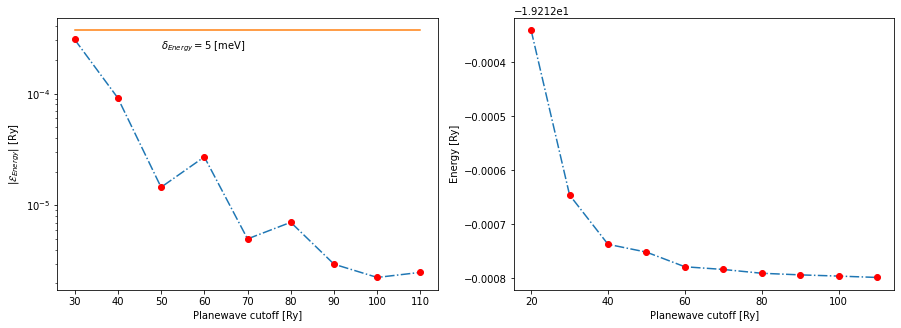

In [ ]:
cutoff_1a = np.array([20,30,40,50,60,70,80,90,100,110])
si_energy_cutoff = np.array([-19.21234082,-19.21264567,-19.21273687,-19.21275137,-19.21277846,-19.21278346,-19.21279050,-19.21279347,-19.21279573,-19.21279824])
energy_1a = si_energy_cutoff
energy_difference_cutoff = np.abs(np.array([energy_1a[1]-energy_1a[0],energy_1a[2]-energy_1a[1],energy_1a[3]-energy_1a[2],energy_1a[4]-energy_1a[3],energy_1a[5]-energy_1a[4],energy_1a[6]-energy_1a[5],energy_1a[7]-energy_1a[6],energy_1a[8]-energy_1a[7],energy_1a[9]-energy_1a[8]]))

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(cutoff_1a[1:10],np.abs(energy_difference_cutoff), '-.') 
axs[0].plot(cutoff_1a[1:10],np.abs(energy_difference_cutoff), 'ro') 
axs[0].plot([30, 110], [0.00036749405469679, 0.00036749405469679], '-')
axs[0].text(50, 0.00025, '$\delta_{Energy} = 5$ [meV]')
axs[0].set_xlabel('Planewave cutoff [Ry]')
axs[0].set_ylabel('|$\mathcal{E}_{Energy}$| [Ry]')
axs[0].set_yscale('log')
axs[1].plot(cutoff_1a, si_energy_cutoff, '-.')
axs[1].plot(cutoff_1a, si_energy_cutoff, 'ro')
axs[1].set_xlabel('Planewave cutoff [Ry]')
axs[1].set_ylabel('Energy [Ry]')

It can be observed from the left sub figure that the energy difference converged at 30 Ry.

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/Si.k.1.out https://hanfengzhai.net/data/MSE5720/Si.k.2.out https://hanfengzhai.net/data/MSE5720/Si.k.3.out https://hanfengzhai.net/data/MSE5720/Si.k.4.out https://hanfengzhai.net/data/MSE5720/Si.k.5.out https://hanfengzhai.net/data/MSE5720/Si.k.6.out https://hanfengzhai.net/data/MSE5720/Si.k.7.out https://hanfengzhai.net/data/MSE5720/Si.k.8.out https://hanfengzhai.net/data/MSE5720/Si.k.9.out https://hanfengzhai.net/data/MSE5720/Si.k.10.out https://hanfengzhai.net/data/MSE5720/Si.k.11.out

In [ ]:
!awk '/!/' Si.k.1.out Si.k.2.out Si.k.3.out Si.k.4.out Si.k.5.out Si.k.6.out Si.k.7.out Si.k.8.out Si.k.9.out Si.k.10.out Si.k.11.out

!    total energy              =     -17.97654358 Ry
!    total energy              =     -19.06512494 Ry
!    total energy              =     -19.21277846 Ry
!    total energy              =     -19.24591070 Ry
!    total energy              =     -19.25554605 Ry
!    total energy              =     -19.25874215 Ry
!    total energy              =     -19.25990033 Ry
!    total energy              =     -19.26034856 Ry
!    total energy              =     -19.26053082 Ry
!    total energy              =     -19.26060791 Ry
!    total energy              =     -19.26064150 Ry


Text(0, 0.5, 'Energy [Ry]')

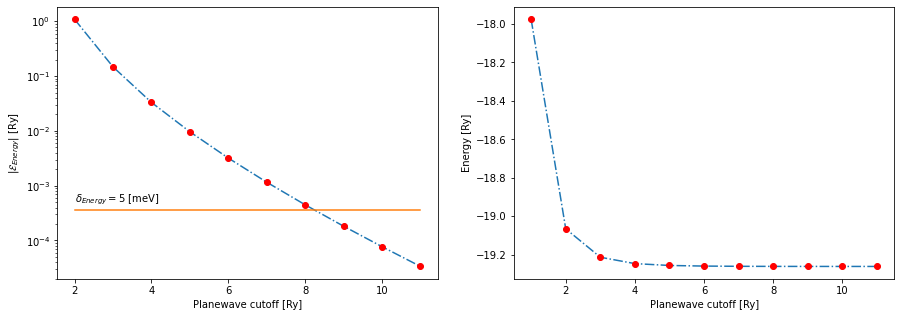

In [ ]:
kpoint_1a = np.array([1,2,3,4,5,6,7,8,9,10,11])
energy_1a_k = np.array([-17.97654358,-19.06512494,-19.21277846,-19.24591070,-19.25554605,-19.25874215,-19.25990033,-19.26034856,-19.26053082,-19.26060791,-19.26064150])

energy_difference_k = np.abs(np.array([energy_1a_k[1]-energy_1a_k[0],energy_1a_k[2]-energy_1a_k[1],energy_1a_k[3]-energy_1a_k[2],energy_1a_k[4]-energy_1a_k[3],energy_1a_k[5]-energy_1a_k[4],energy_1a_k[6]-energy_1a_k[5],energy_1a_k[7]-energy_1a_k[6],energy_1a_k[8]-energy_1a_k[7],energy_1a_k[9]-energy_1a_k[8],energy_1a_k[10]-energy_1a_k[9]]))

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(kpoint_1a[1:11],np.abs(energy_difference_k), '-.') 
axs[0].plot(kpoint_1a[1:11],np.abs(energy_difference_k), 'ro') 
axs[0].plot([2,11], [0.00036749405469679, 0.00036749405469679], '-')
axs[0].text(2, 0.0005, '$\delta_{Energy} = 5$ [meV]')
axs[0].set_xlabel('Planewave cutoff [Ry]')
axs[0].set_ylabel('|$\mathcal{E}_{Energy}$| [Ry]')
axs[0].set_yscale('log')
axs[1].plot(kpoint_1a, energy_1a_k, '-.')
axs[1].plot(kpoint_1a, energy_1a_k, 'ro')
axs[1].set_xlabel('Planewave cutoff [Ry]')
axs[1].set_ylabel('Energy [Ry]')

From the left sub figure it can be deduced that the converged k point is 9.

Changing the calculation methods from ```scf``` to ```vc-relax```, and following the same procedure in HW1, the optimized lattice constant is obtained from ```bfgs```.

* The optimized lattice constant is 10.1941 Ry.

According to [NIST](https://physics.nist.gov/cgi-bin/cuu/Value?asil), the lattice constant for silicon is $5.431 020 511 \times 10^{-10}\rm m$, which is $10.2646\ \rm bohr$. Hence, taking the NIST result as a reference, our converged value has a relative error of $0.6868\%$.

####Band structure

Now we compute the band sturcture of silicon. To better illustrate how the k point in integrated in the microstructure, the following figure is included: the band structure is calculated by integrating the energy on the path: $L → \Gamma → X → U → Γ$, as can be illustrated in the following figure (Hakl, 2012).

<img src="https://www.researchgate.net/profile/Michael-Hakl-2/publication/322927864/figure/fig3/AS:631600375144453@1527596672146/Simplied-Si-band-structure-The-lowest-band-gap-is-not-positioned-directly-at-G-point.png" alt="drawing" height="290"/>

Followed, the band structures are computed from ESPRESSO. Following the procedure given, I change the command to ```ibrav=0``` and modify the $\tt K\_POINT$ based on the list from [Dr. Das](https://pranabdas.github.io/espresso/hands-on/bands):
***
K_POINTS {crystal_b}  
5  
  0.0000 0.5000 0.0000 20  !L  
  0.0000 0.0000 0.0000 30  !G  
  -0.500 0.0000 -0.500 10  !X  
  -0.375 0.2500 -0.375 30  !U  
  0.0000 0.0000 0.0000 20  !G  
***



If compared with the band structure from Niquet et al. (2009), as can be observed from $Γ → X → W → L → Γ$ in their figure (full horizontal axis in my figure), the general band structures are captured with a mild feature difference from the points in the middle regime ($X → U$ in my approach and $X → W → L$ in their approach). 

<img src="https://hanfengzhai.github.io/data/MSE5720/Si_bands.jpg" alt="drawing" height="250"/>


<img src="https://pranabdas.github.io/espresso/assets/images/silicon-bands-56f3d9af6b5d86ba5da780cbf6801b4a.png" alt="drawing" height="250"/>


<img src="https://www.researchgate.net/profile/Yann-Michel-Niquet/publication/23970403/figure/fig1/AS:671534309982215@1537117664390/Color-online-Band-structure-of-bulk-unstrained-silicon-in-the-sp-3-d-5-s-TB-and-GW.png" alt="drawing" height="300"/>

* The chemical character of the band structure is the band possesses an indirect gap.

Regarding to this "mild difference" from my calculation and their's, I proposed the following discussion: 

The work by Niquet et al. integrate the k points differently, causing the mild difference in the area around $W$ and $L$ with $U$. Variation of the k path variate the final band structure. Specifically, the robustness of orbital interactions will affect the density of the final band structure ([Lamontagne, 2018](https://www.mrl.ucsb.edu/~seshadri/2018_218/Bands-k-space.pdf)).

####Density of states

The density of states (DOS) and projected DOS (PDOS) are obtained through DFT calculation of ```&DOS``` and ```&PROJWFC``` using the commands ```dos.x``` and ```projwfc.x```, respectively. The output files are obtained through ```wget``` and the visualization method are partially adopted from [Dr. Das](https://pranabdas.github.io/espresso/).

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/Si_dos.txt https://hanfengzhai.net/data/MSE5720/Si_s_pdos.txt https://hanfengzhai.net/data/MSE5720/Si_p_pdos.txt

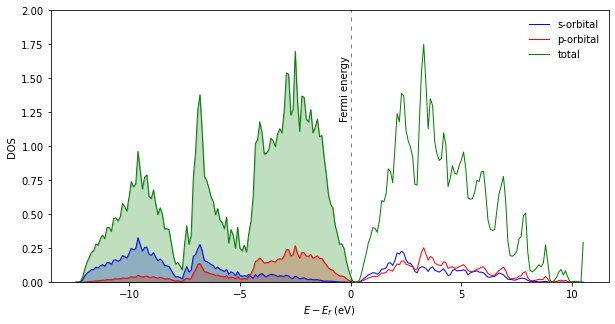

In [ ]:
def data_loader(fname):
    fid = open(fname, "r")
    data = fid.readlines()
    fid.close()

    energy = []
    pdos = []

    for row in range(len(data)):
        data_row = data[row]
        if (data_row[0][0] != '#'):
            data_row = data_row[:-1].split('  ')
            energy.append(float(data_row[1]))
            pdos.append(float(data_row[3]))

    energy = np.asarray(energy)
    pdos = np.asarray(pdos)

    return energy, pdos

energy, pdos_s = data_loader('Si_s_pdos.txt')
_, pdos_p = data_loader('Si_p_pdos.txt')
_, pdos_tot = data_loader('Si_dos.txt')
energy = energy - 6.22
# make plots
plt.figure(figsize = (10, 5))
plt.plot(energy, pdos_s, linewidth=1, color='b', label='s-orbital')
plt.plot(energy, pdos_p, linewidth=1, color='r', label='p-orbital')
plt.plot(energy, pdos_tot, linewidth=1, color='g', label='total')
# plt.yticks([])
plt.xlabel('$E - E_f$ (eV)')
plt.ylabel('DOS')
plt.axvline(x = 0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
# plt.xlim(-6, 16)
plt.ylim(0, 2)
plt.fill_between(energy, 0, pdos_s, where=(energy < 0), facecolor='b', alpha=0.25)
plt.fill_between(energy, 0, pdos_p, where=(energy < 0), facecolor='r', alpha=0.25)
plt.fill_between(energy, 0, pdos_tot, where=(energy < 0), facecolor='g', alpha=0.25)
plt.text(-0.5, 1.2, 'Fermi energy', rotation=90)
plt.legend(frameon=False)
plt.show()

The above figure shows both the DOS and PDOS of silicon. To verify the DOS, a reference figure is adopted from [Argonne National Lab](https://www.alcf.anl.gov/) shown as below:

<img src="https://wiki.alcf.anl.gov/wparker/images/thumb/6/69/DoS_fd-3m_Si_LDA_NCPP-TM_nrl.png/1000px-DoS_fd-3m_Si_LDA_NCPP-TM_nrl.png" alt="drawing" height="350"/> 

It can be observed that the DFT computed DOS has generally similar trends (with major characteristics captured) compared with the reference figure: there are three main peaks under the occupied region and one big ocsillating bigger peak in the unoccupied region. The occupired region ranges from $∼$15eV to 0 and the unoccupied region ranges from $∼$0.5eV to $∼$10eV.

To verify the accurate calculation of PDOS, a reference figure is obtained from [plotly](https://plotly.com/python/v3/ipython-notebooks/density-of-states/), made by [Prof. Vallverdu](https://gvallver.perso.univ-pau.fr/), shown as below:

<img src="https://plotly.com/~gvallverdu/306/bands-diagram-and-density-of-states-of-silicon.png" alt="drawing" height="350"/>

Comparing the ESPRESSO calculated PDOS (blue line stands for s orbital, red line stands for p orbital, and green line stands for total PDOS in my approach) with the above figure, the PDOS basically matches with similar trends: the green line from the above figure with the red line in my figure possess very similar trends, the red line from above also possess similar trends with my blue line.

###Exercise 1B

*What is the band gap for Si? Is Si a direct or indirect gap insulator? How does your gap compare with experiment, and with other DFT calculations in the literature?*

There are many ways to obtain the band gap from DFT. Here, I examine two of which to test my results either directly extracted from the energy difference from the ```.out``` file, or plot the DOS and compute the length of the "zero value regime". 

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/Si.out

In [ ]:
!awk '/highest/' Si.out

     highest occupied, lowest unoccupied level (ev):     6.2200    6.7077


In [ ]:
band_gap = 6.7077 - 6.2200; print(band_gap)

0.48770000000000024


Hence the band gap obtained from DFT is approximately 0.49eV.

* The second way to compute band gap is through capturing the length of the "zero value regime" in the DOS plot.

To compute the band gap, instead of taking the default value of $Δ E = 0.1\rm eV$, we increase the energy discretization density to $Δ E = 0.01\rm eV$ and the compared figure is shown as below.


<img src="https://hanfengzhai.net/data/MSE5720/dos_silicon.jpg" alt="drawing" height="350"/>



* Using this method, the computed band gap is $6.67 - 6.22 = 0.45 \rm eV$.

Here, due to the Fermi level being in the bandgap ([Ref. link](https://www.physicsforums.com/threads/what-makes-a-semiconducting-material-a-semiconductor.410165/)) for silicon. We can therefore say silicon is a semiconductor. Compared with the reference data from Singh et al. (2013), the LDA computed band gap of silicon is 0.49eV, where the relative of our value is $8.16\%$, which is an acceptable value. If taking the value of 0.49eV from directly calculating the difference from the ```.out``` file shown above, the relative error is $0\%$. However, the actual experimental measured band gap is 1.12eV (Toshiba website). Obviously, the LDA computed bandgap is not so accurate. As proposed by Persson and Mirbt (2006): "if a too strong electron-electron repulsion within LDA, the electron (wavefunction) overlap is too small and thus also the semiconductor band gap becomes too small." This finding perfectly explains our inaccurate computation of silicon band gaps.

###Exercise 1C

*Examine the DOS for bulk Si and Si doped with Au in Figure 2 (from [Sholl & Steckel, 2009](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470447710)). Pay particular attention to the DOS at the band gap. Now read [Nature Materials 4 676 (2005)](https://www.nature.com/articles/nmat1457). How do you think the presence of Au affects the performance of Si in solar cells?*

From Fig. 2 (HW), there are two evident peaks occurring at $E \approx 0\rm eV$ and $E \approx 5\rm eV$ (bandgap regime) for Au doped Si compared with pure Si. Just from this figure, we can conclude that the existence of Au changes the DOS of the bandgap region, leading to an obvious density of states "peak" existing in the bandgap region of Au doped silicon which is more similar to conductors rather than semiconductors. From the differences in DOS, we can further conclude that the existence of Au changes the occupancy of the electrons in Si. The major electric conductivity does not variate much. Referring to Buonassisi et al., it is stated that metal-contained semiconductors can still be viewed as accepted material for solar cells since nano defect engineering can reduce the electronic characteristic of the metal impurities. Also, from the mentioned existing metal particles that will change the diffusion length of the carrier we can further conclude that existing Au changes the electronic diffusion and further DOS of the silicon. Hence, combining both the viewpoints we can deduce that the existence of metal nano-defect in Si changes the occupancy of electrons and further the diffusion length, which variates its electronic properties. Specifically, the Au caused "bandgap diminishment" leads to decreased efficiency of Si-based solar cells.

##Exercise 2: Calculation of elastic constants

###Exercise 2A

*Calculate $C_{11}$, $C_{12}$ and $C_{44}$ for both diamond and Si following the procedure above. Calculate the total energy as a function $U$ for $\eta$ = -0.006, -0.004, -0.002, 0.002, 0.004 and 0.006. Fit the energy change per unit volume ($\Delta U / \Omega$) for each value of $\eta$ to Equations 2, 3 and 4 to obtain the elastic constants (note that the zero distortion point must also be part of your fit: $\Delta U / \Omega=0$, $\eta = 0$).*

The isotropic, tetragonal, and trigonal deformations are applied to the silicon unit cell, respectively, using the ```relax``` computation method. The total energies are hence obtained using ```awk``` command. The data were fitted using the MATLAB $\tt curve \ fitting$ toolbox. The uncertainty range are presented and the fitted values are readjusted from the curve fitting. The calculated elastic constants were compared with literature values.


* Silicon under isotropic deformation:

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/Si_isotro.cell_0.497.out https://hanfengzhai.net/data/MSE5720/Si_isotro.cell_0.498.out https://hanfengzhai.net/data/MSE5720/Si_isotro.cell_0.499.out https://hanfengzhai.net/data/MSE5720/Si_isotro.cell_0.500.out https://hanfengzhai.net/data/MSE5720/Si_isotro.cell_0.501.out https://hanfengzhai.net/data/MSE5720/Si_isotro.cell_0.502.out https://hanfengzhai.net/data/MSE5720/Si_isotro.cell_0.503.out

In [ ]:
!awk '/!/' Si_isotro.cell_0.497.out Si_isotro.cell_0.498.out Si_isotro.cell_0.499.out Si_isotro.cell_0.500.out Si_isotro.cell_0.501.out Si_isotro.cell_0.502.out Si_isotro.cell_0.503.out

!    total energy              =     -19.25993760 Ry
!    total energy              =     -19.26010114 Ry
!    total energy              =     -19.26019930 Ry
!    total energy              =     -19.26023651 Ry
!    total energy              =     -19.26020774 Ry
!    total energy              =     -19.26011713 Ry
!    total energy              =     -19.25996848 Ry


In [ ]:
!awk '/volume/' Si_isotro.cell_0.497.out Si_isotro.cell_0.498.out Si_isotro.cell_0.499.out Si_isotro.cell_0.500.out Si_isotro.cell_0.501.out Si_isotro.cell_0.502.out Si_isotro.cell_0.503.out

     unit-cell volume          =     260.9385 (a.u.)^3
     unit-cell volume          =     262.5168 (a.u.)^3
     unit-cell volume          =     264.1014 (a.u.)^3
     unit-cell volume          =     265.6923 (a.u.)^3
     unit-cell volume          =     267.2897 (a.u.)^3
     unit-cell volume          =     268.8934 (a.u.)^3
     unit-cell volume          =     270.5036 (a.u.)^3


* Silicon under tetragonal deformation:

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/Si_tt.cell_0.497.out https://hanfengzhai.net/data/MSE5720/Si_tt.cell_0.498.out https://hanfengzhai.net/data/MSE5720/Si_tt.cell_0.499.out https://hanfengzhai.net/data/MSE5720/Si_tt.cell_0.500.out https://hanfengzhai.net/data/MSE5720/Si_tt.cell_0.501.out https://hanfengzhai.net/data/MSE5720/Si_tt.cell_0.502.out https://hanfengzhai.net/data/MSE5720/Si_tt.cell_0.503.out

In [ ]:
!awk '/!/' Si_tetra.cell_0.497.out Si_tetra.cell_0.498.out Si_tetra.cell_0.499.out Si_tetra.cell_0.500.out Si_tetra.cell_0.501.out Si_tetra.cell_0.502.out Si_tetra.cell_0.503.out

!    total energy              =     -19.25988135 Ry
!    total energy              =     -19.26015050 Ry
!    total energy              =     -19.26031322 Ry
!    total energy              =     -19.26036737 Ry
!    total energy              =     -19.26031255 Ry
!    total energy              =     -19.26014538 Ry
!    total energy              =     -19.25986434 Ry


In [ ]:
!awk '/volume/' Si_tetra.cell_0.497.out Si_tetra.cell_0.498.out Si_tetra.cell_0.499.out Si_tetra.cell_0.500.out Si_tetra.cell_0.501.out Si_tetra.cell_0.502.out Si_tetra.cell_0.503.out

     unit-cell volume          =     269.9823 (a.u.)^3
     unit-cell volume          =     269.9985 (a.u.)^3
     unit-cell volume          =     270.0082 (a.u.)^3
     unit-cell volume          =     270.0114 (a.u.)^3
     unit-cell volume          =     270.0081 (a.u.)^3
     unit-cell volume          =     269.9984 (a.u.)^3
     unit-cell volume          =     269.9821 (a.u.)^3


The obtained energy and volume values based on different $\eta$ were then substitute into the Equations. $C_{11}$ and $C_{12}$ were then solved from Equations ($2$) and ($3$). To specify the uncertainty during the curve fitting, the range of the fitting data were also presented below.

In [ ]:
from sympy import *
C11 = Symbol('C11')
C12 = Symbol('C12')
eqs = [-19.26023079 - (-19.26022306) - 266.4341*1.5*(C11+2*C12)*4e-6,\
       -19.26023079 - (-19.26022306) - 266.4341*3*(C11-C12)*4e-6]
solu_2 = solve(eqs, [C11, C12])
solu_2

{C11: -0.00322364475455432, C12: -0.000805911188638579}

In [ ]:
vol_Si_iso = np.array([265.1803,266.7842,268.3946,270.0114,271.6347,273.2645,274.9008])
lat_Si = np.array([-0.006,-0.004,-0.002,0,0.002,0.004,0.006])
Ener_Si_iso = np.array([-19.26022905,-19.26022374,-19.26015209,-19.26001820,-19.25982786,-19.25957495,-19.25926397])
vol_Si_tetra = np.array([269.9823,269.9985,270.0082,270.0114,270.0081,269.9984,269.9821])
Ener_Si_tetra = np.array([-19.26007342,-19.26035228,-19.26052123,-19.26057737,-19.26052096,-19.26034777,-19.26005644])
EnerSi_iso_fit = (Ener_Si_iso - (-19.26001820))/270.0114
EnerSi_tetra_fit = (Ener_Si_tetra - (-19.26057737))/264.8419
EnerSi_tetra_fit = np.abs(EnerSi_tetra_fit)

def Si_fit_iso(lat_Si, const1):
  return 1.5* (const1)*(lat_Si)**2
popt_iso, pcov_iso = scipy.optimize.curve_fit(Si_fit_iso, lat_Si, EnerSi_iso_fit)
print(popt_iso)

[0.01857351]


We first trying to solve $C_{11}$ and $C_{12}$ by applying isotropic and tetragonal deformation to the silicon unit cell and fitting the curve:

* For isotropic deformation:

<img src="https://hanfengzhai.net/data/MSE5720/silicon_iso.png" alt="drawing" height="300"/>

From the data fitting it is obtained that the fitted $\frac{3}{2}(C_{11} + 2C_{12}) \approx 0.03 \times 14710.5 \rm GPa$; hence: $C_{11} + 2C_{12} = 294.2100 \rm GPa$. The fitting data for $\frac{U - U_0}{\Omega}$ to $\eta$ in $\rm Ry/bohr^3$ range is $\tt [0.02907, 0.03]$, where the fitting $R^2$ is 0.9999.

* For tetragonal deformation:

<img src="https://hanfengzhai.net/data/MSE5720/silicon_tet.png" alt="drawing" height="300"/>

From the data fitting it is obtained that the fitted $3(C_{11} - C_{12}) \approx 0.02 \times 14710.5 \rm GPa$; hence: $C_{11} - C_{12} =  98.5603 \rm GPa$. The fitting data for $\frac{U - U_0}{\Omega}$ to $\eta$ in $\rm Ry/bohr^3$ range is $\tt [0.01948, 0.02001]$, where the fitting $R^2$ is 0.9999.

We can therefore solve for $C_{11}$ and $C_{12}$:

In [ ]:
from sympy import *
C11 = Symbol('C11')
C12 = Symbol('C12')
eqs = [C11 + 2*C12 - 294.2100,\
       C11 - C12 - 98.5603]
silicon_solu = solve(eqs, [C11, C12])
print(silicon_solu)


{C11: 163.776866666667, C12: 65.2165666666667}


It is thence obtained that the elastic constant for silicon are: $C_{11} = 163.78\rm GPa$ and $C_{12} = 65.22\rm GPa$.

Compared with the results from Hall (1967) with $C_{11}$ and $C_{12}$ equals 165.64 and 63.94GPa, respectively, my results have relative errors of $1.12\%$ and $2 \%$, respectively, which can be considered as good accuracy.

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/Si_tri.cell_1.out https://hanfengzhai.net/data/MSE5720/Si_tri.cell_2.out https://hanfengzhai.net/data/MSE5720/Si_tri.cell_3.out https://hanfengzhai.net/data/MSE5720/Si_tri.cell_4.out https://hanfengzhai.net/data/MSE5720/Si_tri.cell_5.out https://hanfengzhai.net/data/MSE5720/Si_tri.cell_6.out https://hanfengzhai.net/data/MSE5720/Si_tri.cell_7.out

In [ ]:
!awk '/Final/' Si_tri.cell_1.out Si_tri.cell_2.out Si_tri.cell_3.out Si_tri.cell_4.out Si_tri.cell_5.out Si_tri.cell_6.out Si_tri.cell_7.out

     Final energy             =     -19.2605450813 Ry
     Final energy             =     -19.2605578027 Ry
     Final energy             =     -19.2605656048 Ry
     Final energy             =     -19.2605691505 Ry
     Final energy             =     -19.2605656047 Ry
     Final energy             =     -19.2605578027 Ry
     Final energy             =     -19.2605450813 Ry


The elastic constant $C_{44}$ can then be calculated by applying the trigonal deformation to the silicon unit cell:

<img src="https://hanfengzhai.net/data/MSE5720/silicon_tri.png" alt="drawing" height="300"/>

It can be concluded from curve fitting that $\frac{1}{2}C_{44} \approx 0.00259 \times 14710.5\rm GPa$ $→$ $ C_{44} = 76.4946\rm GPa$. The fitting data for $\frac{U - U_0}{\Omega}$ to $\eta$ in $\rm Ry/bohr^3$ range is $\tt [0.002304, 0.00259]$, where the fitting $R^2$ is 0.9987.

The k point and energy cutoff for the convergent energy of diamond are then calculated following the same procedure from HW 1. 

Text(0, 0.5, 'Energy [Ry]')

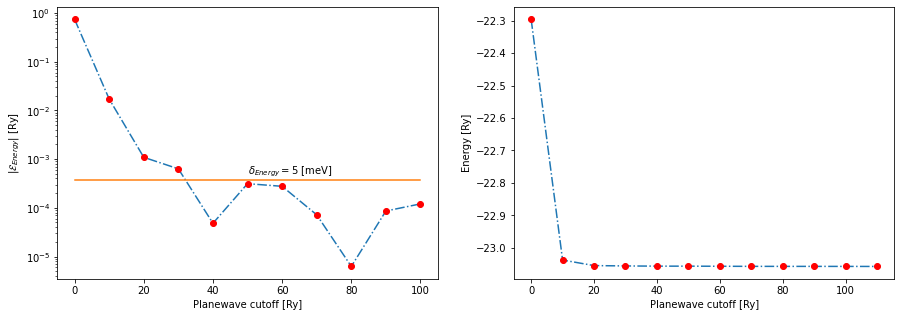

In [ ]:
Diamond_energy_cutoff = np.array([-22.29597645,-23.03782401,-23.05495035,-23.05603958,-23.05667118,-23.05671926,-23.05703253,-23.05730891,-23.05738074,-23.05738699,-23.05747302,-23.05759346])
Diamond_cutoff = np.arange(0,120,10)
Diamond_energy_ecut_diff = np.array([Diamond_energy_cutoff[1]-Diamond_energy_cutoff[0],Diamond_energy_cutoff[2]-Diamond_energy_cutoff[1],\
                                     Diamond_energy_cutoff[3]-Diamond_energy_cutoff[2],Diamond_energy_cutoff[4]-Diamond_energy_cutoff[3],\
                                     Diamond_energy_cutoff[5]-Diamond_energy_cutoff[4],Diamond_energy_cutoff[6]-Diamond_energy_cutoff[5],\
                                     Diamond_energy_cutoff[7]-Diamond_energy_cutoff[6],Diamond_energy_cutoff[8]-Diamond_energy_cutoff[7],\
                                     Diamond_energy_cutoff[9]-Diamond_energy_cutoff[8],Diamond_energy_cutoff[10]-Diamond_energy_cutoff[9],\
                                     Diamond_energy_cutoff[11]-Diamond_energy_cutoff[10]])
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(Diamond_cutoff[0:11],np.abs(Diamond_energy_ecut_diff), '-.') 
axs[0].plot(Diamond_cutoff[0:11],np.abs(Diamond_energy_ecut_diff), 'ro') 
axs[0].plot([0, 100], [0.00036749405469679, 0.00036749405469679], '-')
axs[0].text(50, 0.0005, '$\delta_{Energy} = 5$ [meV]')
axs[0].set_xlabel('Planewave cutoff [Ry]')
axs[0].set_ylabel('|$\mathcal{E}_{Energy}$| [Ry]')
axs[0].set_yscale('log')
axs[1].plot(Diamond_cutoff, Diamond_energy_cutoff, '-.')
axs[1].plot(Diamond_cutoff, Diamond_energy_cutoff, 'ro')
axs[1].set_xlabel('Planewave cutoff [Ry]')
axs[1].set_ylabel('Energy [Ry]')

From the figure it can be concluded that the converged energy cutoff is 40 Ry.

Text(0, 0.5, 'Energy [Ry]')

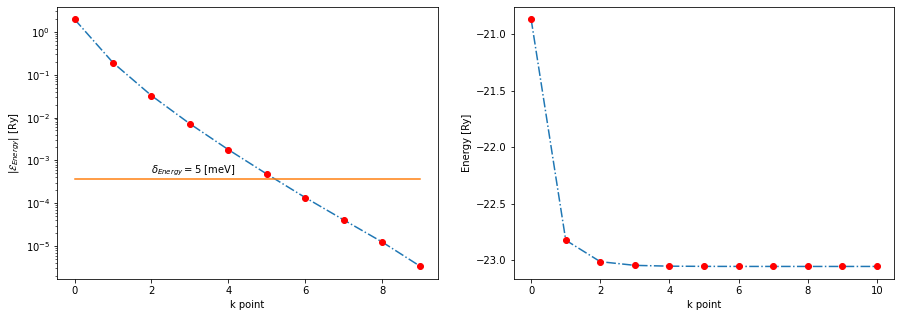

In [ ]:
Diamond_energy_kpoint = np.array([-20.86940192,-22.82442708,-23.01464498,-23.04709100,-23.05423188,-23.05601252,-23.05649305,-23.05662877,-23.05666961,-23.05668208,-23.05668542])
Diamond_kpoint = np.arange(0,11,1)
Diamond_energy_ecut_diff = np.array([Diamond_energy_kpoint[1]-Diamond_energy_kpoint[0],Diamond_energy_kpoint[2]-Diamond_energy_kpoint[1],\
                                     Diamond_energy_kpoint[3]-Diamond_energy_kpoint[2],Diamond_energy_kpoint[4]-Diamond_energy_kpoint[3],\
                                     Diamond_energy_kpoint[5]-Diamond_energy_kpoint[4],Diamond_energy_kpoint[6]-Diamond_energy_kpoint[5],\
                                     Diamond_energy_kpoint[7]-Diamond_energy_kpoint[6],Diamond_energy_kpoint[8]-Diamond_energy_kpoint[7],\
                                     Diamond_energy_kpoint[9]-Diamond_energy_kpoint[8],Diamond_energy_kpoint[10]-Diamond_energy_kpoint[9]])

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(Diamond_kpoint[0:10],np.abs(Diamond_energy_ecut_diff), '-.')
axs[0].plot(Diamond_kpoint[0:10],np.abs(Diamond_energy_ecut_diff), 'ro')
axs[0].plot([0, 9], [0.00036749405469679, 0.00036749405469679], '-')
axs[0].text(2, 0.0005, '$\delta_{Energy} = 5$ [meV]')
axs[0].set_xlabel('k point')
axs[0].set_ylabel('|$\mathcal{E}_{Energy}$| [Ry]')
axs[0].set_yscale('log')
axs[1].plot(Diamond_kpoint, Diamond_energy_kpoint, '-.')
axs[1].plot(Diamond_kpoint, Diamond_energy_kpoint, 'ro')
axs[1].set_xlabel('k point')
axs[1].set_ylabel('Energy [Ry]')

From the figure it can be concluded that the converged k point is 6.

Now we will calculate the optimized lattice constant of diamond. Taking the optimal k point and energy cutoff, we substitute them and change the calculation to ```vc-relax```. The optimized lattice constant is $6.6740$ bohr.

In [ ]:
# !wget https://hanfengzhai.net/data/MSE5720/Diamond_iso.0.497.out https://hanfengzhai.net/data/MSE5720/Diamond_iso.0.498.out https://hanfengzhai.net/data/MSE5720/Diamond_iso.0.499.out https://hanfengzhai.net/data/MSE5720/Diamond_iso.0.500.out https://hanfengzhai.net/data/MSE5720/Diamond_iso.0.501.out https://hanfengzhai.net/data/MSE5720/Diamond_iso.0.502.out https://hanfengzhai.net/data/MSE5720/Diamond_iso.0.503.out
# !wget https://hanfengzhai.net/data/MSE5720/Diamond_tet.0.497.out https://hanfengzhai.net/data/MSE5720/Diamond_tet.0.498.out https://hanfengzhai.net/data/MSE5720/Diamond_tet.0.499.out https://hanfengzhai.net/data/MSE5720/Diamond_tet.0.500.out https://hanfengzhai.net/data/MSE5720/Diamond_tet.0.501.out https://hanfengzhai.net/data/MSE5720/Diamond_tet.0.502.out https://hanfengzhai.net/data/MSE5720/Diamond_tet.0.503.out

In [ ]:
!awk '/Final/' Diamond_iso.0.497.out Diamond_iso.0.498.out Diamond_iso.0.499.out Diamond_iso.0.500.out Diamond_iso.0.501.out Diamond_iso.0.502.out Diamond_iso.0.503.out
!awk '/volume/' Diamond_iso.0.497.out Diamond_iso.0.498.out Diamond_iso.0.499.out Diamond_iso.0.500.out Diamond_iso.0.501.out Diamond_iso.0.502.out Diamond_iso.0.503.out

     Final energy             =     -23.0558804926 Ry
     Final energy             =     -23.0561030317 Ry
     Final energy             =     -23.0562486048 Ry
     Final energy             =     -23.0562744155 Ry
     Final energy             =     -23.0562181536 Ry
     Final energy             =     -23.0560911942 Ry
     Final energy             =     -23.0558855524 Ry
     unit-cell volume          =      73.1204 (a.u.)^3
     unit-cell volume          =      73.5626 (a.u.)^3
     unit-cell volume          =      74.0067 (a.u.)^3
     unit-cell volume          =      74.4525 (a.u.)^3
     unit-cell volume          =      74.9001 (a.u.)^3
     unit-cell volume          =      75.3495 (a.u.)^3
     unit-cell volume          =      75.8007 (a.u.)^3


In [ ]:
!awk '/Final/' Diamond_tet.0.497.out Diamond_tet.0.498.out Diamond_tet.0.499.out Diamond_tet.0.500.out Diamond_tet.0.501.out Diamond_tet.0.502.out Diamond_tet.0.503.out
!awk '/volume/' Diamond_tet.0.497.out Diamond_tet.0.498.out Diamond_tet.0.499.out Diamond_tet.0.500.out Diamond_tet.0.501.out Diamond_tet.0.502.out Diamond_tet.0.503.out

     Final energy             =     -23.0557319258 Ry
     Final energy             =     -23.0560300830 Ry
     Final energy             =     -23.0562067149 Ry
     Final energy             =     -23.0562684204 Ry
     Final energy             =     -23.0562085830 Ry
     Final energy             =     -23.0560317161 Ry
     Final energy             =     -23.0557459218 Ry
     unit-cell volume          =      74.2440 (a.u.)^3
     unit-cell volume          =      74.2484 (a.u.)^3
     unit-cell volume          =      74.2511 (a.u.)^3
     unit-cell volume          =      74.2520 (a.u.)^3
     unit-cell volume          =      74.2511 (a.u.)^3
     unit-cell volume          =      74.2484 (a.u.)^3
     unit-cell volume          =      74.2439 (a.u.)^3


###Mechanical properties of diamond

Diamond under isotropic deformation for computing $C_{11}$ and $C_{12}$.

<img src="https://hanfengzhai.net/data/MSE5720/diamond_iso.png" alt="drawing" height="290"/>

From the MATLAB ```Curve Fitting Tool```, it can be observed that the fitting value for $\frac{3}{2} (C_{11}+2C_{12}) \approx 0.15 \times 14710.5 \rm GPa$, $\longrightarrow (C_{11}+2C_{12}) =1471.1\rm GPa $. The fitting data for $\frac{U - U_0}{\Omega}$ to $\eta$ in $\rm Ry/bohr^3$ range is $\tt [0.135, 0.1583]$, where the fitting $R^2$ is 0.9967.


Diamond under tetrahetron deformation

<img src="https://hanfengzhai.net/data/MSE5720/diamond_tet.png" alt="drawing" height="300"/>

From the MATLAB ```Curve Fitting Tool```, it can be observed that the fitting value for $3 (C_{11}-C_{12}) \approx 0.19 \times 14710.5 \rm GPa$, $\longrightarrow (C_{11}-C_{12}) =931.1746\rm GPa $. The fitting data for $\frac{U - U_0}{\Omega}$ to $\eta$ in $\rm Ry/bohr^3$ range is $\tt [0.1949, 0.2003]$, where the fitting $R^2$ is 0.9999.

We can hence solve the equations for $C_{11}$ and $C_{12}$:

In [ ]:
from sympy import *
C11 = Symbol('C11')
C12 = Symbol('C12')
eqs = [C11 + 2*C12 - 1471.1,\
       C11 - C12 - 931.17]
diamond_solu = solve(eqs, [C11, C12])
print(diamond_solu)


{C11: 1111.14666666667, C12: 179.976666666667}


From the data fitting it can be deduced that the computed elastic constants: $C_{11}$ and $C_{12}$ equals 1111.15 and 179.97 GPa, respectively. Compared with the experimental value of $C_{11}, C_{12} = 1078.3, 126.5\rm GPa$, respectively, by Migliori et al. (2008), my computation results have relative errors of $3.05\%$ and $42.27\%$, respectively. It can be observed that the $C_{11}$ has good accuracy whereas $C_{12}$ does not have a good prediction accuracy. However, if compared with also the computation methods proposed by Shao et al. (2012), the prediction of $C_{12}$ by the two different computation methods proposed by the author was 160.2 and 169.1 GPa, where my computation results have relative errors of $12.3\%$ and $6.39\%$, respectively. Although the relative errors are still relatively large, the results can be considered as acceptable. It is hence concluded that the computation for $C_{12}$ tend to exhibits higher errors.

Diamond under trigonal deformation:

<img src="https://hanfengzhai.net/data/MSE5720/diamond_tri.png" alt="drawing" height="300"/>

From the data fitting results of MATLAB curve fitting results, it can be deduced that $\frac{1}{2} C_{44} = 0.0202 \times 14710.5 \rm GPa$. The fitting data for $\frac{U - U_0}{\Omega}$ to $\eta$ in $\rm Ry/bohr^3$ range is $\tt [0.02025, 0.02269]$, where the fitting $R^2$ is 0.9975. We can hence solve for $C_{44} = 588.4200\rm GPa$. Compared with the experimental results of 577.5 GPa by Migliori et al. (2008), my result has a relative error of $1.89\%$, which has a decent accuracy.

In [ ]:
!awk '/!/' Diamond.0.497.out Diamond.0.498.out Diamond.0.499.out Diamond.0.500.out Diamond.0.501.out Diamond.0.502.out Diamond.0.503.out

In [ ]:
!awk '/volume/' Diamond.0.497.out Diamond.0.498.out Diamond.0.499.out Diamond.0.500.out Diamond.0.501.out Diamond.0.502.out Diamond.0.503.out

In [ ]:
lat_diamond = lat_Si
Ener_Diamond = np.array([-23.05552571,-23.05567272,-23.05570645,-23.05563344,-23.05545233,-23.05516837,-23.05477257])
plt.plot(lat_diamond,Ener_Diamond)

###Exercise 2B

*How do your results compare with experiment and with other calculations from the literature?*

As compared previously, for silicon, the elastic constants are: $C_{11} = 163.78\rm GPa$, $C_{12} = 65.22\rm GPa$, & $ C_{44} = 76.4946\rm GPa$. If taking the experimental data by Hall (1967) as a reference, the relative errors for elastic constants are 1.1229%, 2%, and 3.79%, respectively. If taking the computation results using the LDA pseudopotential by Barhoumi et al. (2021) as a reference, the relative errors for elastic constants are 2.11%, 0.65%, and 1.38%, respectively. For diamond, the computed elastic constants are $C_{11}, C_{12} = 1078.3, 126.5\rm GPa$, and $C_{44} = 588.4200\rm GPa$, respectively. If taking the experimental data from McSkimin and Andreatch (1972) as references, the relative errors are 0.0649%, 2.02%, and 1.8%, respectively. If compared with the computation results using the LDA pseudopotential by Barhoumi et al. (2021), the relative errors are 2.47%, 15.33% and 0.71%, respectively.

##Exercise 3

In this exercise I wrote different bash files containing different ```for``` loops to automate the computation process through going through the targeted values. This allows the script to automatically generate all the in files and run them to generate the out files for postprocessing. There is also a modified ```.py``` file for cubic deformation elastic constants computation. The bash files contain both isotropic, tetragonal, and trigonal deformations. To obtain the bash script I wrote, the ```wget``` command is still adopted:


In [ ]:
!wget https://hanfengzhai.net/data/MSE5720/Si_iso.sh https://hanfengzhai.net/data/MSE5720/Si_tetra.sh https://hanfengzhai.net/data/MSE5720/Si_tri.sh https://hanfengzhai.net/data/MSE5720/diamond_iso.sh https://hanfengzhai.net/data/MSE5720/diamond_tetra.sh https://hanfengzhai.net/data/MSE5720/diamond_tri.sh https://hanfengzhai.net/data/MSE5720/convergence_script.py https://hanfengzhai.net/data/MSE5720/create_scf_file.py https://hanfengzhai.net/data/MSE5720/cub_elastic_const_runjobs.py

--2022-03-19 18:57:05--  https://hanfengzhai.net/data/MSE5720/Si_iso.sh
Resolving hanfengzhai.net (hanfengzhai.net)... 185.199.108.153
Connecting to hanfengzhai.net (hanfengzhai.net)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [application/x-sh]
Saving to: ‘Si_iso.sh’

Si_iso.sh           100%[===================>]   1.33K  --.-KB/s    in 0s      

2022-03-19 18:57:05 (68.6 MB/s) - ‘Si_iso.sh’ saved [1359/1359]

--2022-03-19 18:57:05--  https://hanfengzhai.net/data/MSE5720/Si_tetra.sh
Reusing existing connection to hanfengzhai.net:443.
HTTP request sent, awaiting response... 200 OK
Length: 1410 (1.4K) [application/x-sh]
Saving to: ‘Si_tetra.sh’

Si_tetra.sh         100%[===================>]   1.38K  --.-KB/s    in 0s      

2022-03-19 18:57:06 (26.3 MB/s) - ‘Si_tetra.sh’ saved [1410/1410]

--2022-03-19 18:57:06--  https://hanfengzhai.net/data/MSE5720/Si_tri.sh
Reusing existing connection to hanfengzhai.net:443.
HTTP request sen

##Summary

In this homework, there are three exercises majorly covering the DFT calculation of electronic and elastic properties of silicon and diamond. In exercise 1, the electronic property, i.e. density of states, projected density of states, band structure, bandgap, and nano-defect influence on the electronic conductance. In exercise 2 we were assigned to compute the elastic constants of diamond and silicon by changing the deformation of the unit cells in isotropic, tetragonal, and trigonal forms. The elastic constants are then obtained by fitting the curve using MATLAB. The resultant values were compared with the literature values and discussed.

There are many difficulties encountered during the process. To elaborate them, I hereby listed with the solution I came up with to solve the problems:

* Initially, the bandgap does not fit any reference data from online or reference, thanks to the [tutorial](https://pranabdas.github.io/espresso/) of Pranab, I changed my $\tt K\_POINTS$ based on his reference, and the resultant band structure actually looks like the literary figure.

* The data fitting from 2 always land in different values and mild change leads to a huge difference. Especially, directly fitting the data using the ``` script.optimize.curve_fit``` function ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)) results in only one value that does not always land in the correct range. Hence, I fit the data using the MATLAB curve fitting tool, where the fitted parameters land in a probabilistic range so that one can pick a value that is more fitted in the correct range based on the experimental value or other computation results.

##References

[1] Yakovkin and Dowben. *Surface Review and Letters*. 2007. [10.1142/S0218625X07009499](http://dx.doi.org/10.1142/S0218625X07009499)

[2] Klein and Cardinale. *DRM*. 1993. [10.1016/0925-9635(93)90250-6](https://doi.org/10.1016/0925-9635(93)90250-6)

[3] Singh *et al.* *Phys. Rev. B, Cond. Matt.*, 2013, [10.1103/PhysRevB.87.235110](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.87.235110)

[4] Shao *et al.*, *J. Appl. Phys.*, 2012. [10.1063/1.4704698](https://doi.org/10.1063/1.4704698)

[5] Migliori *et al.* *J. Appl. Phys*, 2008. [10.1063/1.2975190](https://aip.scitation.org/doi/abs/10.1063/1.2975190)

[6] Hall. *Phys. Rev.* 1967. [10.1103/PhysRev.161.756](https://doi.org/10.1103/PhysRev.161.756)

[7] Hakl. *Bachelor Thesis of Charles University*. 2012. [ResearchGate](https://www.researchgate.net/publication/322927864_Study_of_properties_of_hetero-structured_thin_silicon_films_by_AFM)

[8] Band Gap of Silicon. Accessed on [Toshiba Website](https://toshiba.semicon-storage.com/us/semiconductor/knowledge/faq/diode_sic-sbd/sic-sbd001.html#:~:text=Si%20(Silicon)%20has%20a%20band,wide%2Dband%2Dgap%20semiconductor.).

[9] Niquet *et al*. *Phys. Rev. B.* 2009 [10.1103/PhysRevB.79.245201](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.79.245201)

[10] Persson and Mirbt. *Braz. J. Phys.* [10.1590/S0103-97332006000300014](http://dx.doi.org/10.1590/S0103-97332006000300014).

[11] Barhoumi *et al.* *Solid State Communications*. [10.1016/j.ssc.2020.114136](https://doi.org/10.1016/j.ssc.2020.114136)

[12] McSkimin and Andreatch. *J. Appl. Phys.* [10.1063/1.1661636](https://doi.org/10.1063/1.1661636)
